# **Introduction**

‡∏™‡∏ß‡∏±‡∏™‡∏î‡∏µ‡∏Ñ‡∏£‡∏±‡∏ö ‡∏ô‡∏µ‡πâ‡πÄ‡∏õ‡πá‡∏ô‡∏Å‡∏≤‡∏£‡∏™‡πà‡∏á Final Project ‡∏Ç‡∏≠‡∏á CS434

‡∏ó‡∏∏‡∏Å‡πÜ ‡∏ß‡∏±‡∏ô‡∏ô‡∏µ‡πâ 2 ‡∏û‡∏±‡∏ô‡∏Å‡∏ß‡πà‡∏≤‡∏•‡πâ‡∏≤‡∏ô‡πÅ‡∏≠‡∏û‡πÉ‡∏´‡πâ‡∏ú‡∏π‡πâ‡πÉ‡∏ä‡πÑ‡∏î‡πâ‡∏î‡∏≤‡∏ß‡πÇ‡∏´‡∏•‡∏î ‡πÅ‡∏•‡∏∞‡∏Å‡∏ß‡πà‡∏≤ 2 ‡∏•‡πâ‡∏≤‡∏ô‡∏Å‡∏ß‡πà‡∏≤‡πÅ‡∏≠‡∏û‡πÉ‡∏´‡πâ‡πÇ‡∏´‡∏•‡∏î‡πÉ‡∏ô
Google Play Store. ‡πÅ‡∏≠‡∏û‡∏û‡∏ß‡∏Å‡∏ô‡∏µ‡πâ‡πÑ‡∏î‡πâ‡∏°‡∏µ‡∏ä‡πà‡∏ß‡∏¢‡πÉ‡∏ô‡∏Å‡∏≤‡∏£‡πÉ‡∏ä‡πâ‡∏ä‡∏µ‡∏ß‡∏ï‡∏¥‡∏Ç‡∏≠‡∏á‡∏û‡∏ß‡∏Å‡πÄ‡∏£‡∏≤‡∏à‡∏ô‡∏ñ‡∏∂‡∏á‡∏ó‡∏∏‡∏Å‡∏ß‡∏±‡∏ô‡∏ô‡∏µ‡πâ

‡∏ß‡∏±‡∏ô‡∏ô‡∏µ‡πâ‡∏ú‡∏°‡∏à‡∏∞‡∏°‡∏≤‡∏•‡∏≠‡∏á‡∏®‡∏∂‡∏Å‡∏©‡∏≤‡πÄ‡∏Å‡∏µ‡πà‡∏¢‡∏ß‡∏Å‡∏±‡∏ö‡∏Å‡∏≤‡∏£‡πÅ‡∏ô‡∏∞‡∏ô‡∏≥ App ‡∏ï‡∏≤‡∏°‡∏Ñ‡∏≥‡∏Ñ‡πâ‡∏ô‡∏´‡∏≤‡πÉ‡∏ô‡πÅ‡∏ï‡πà‡∏•‡∏∞‡∏£‡∏π‡∏õ‡πÅ‡∏ö‡∏ö

# **Table of Contents**

-   [Importing Libraries](#importing)
-   [Importing Dataset](#datasets)
-   [Basic Data Exploration](#basic_understanding)
-   [Data Cleaning](#data_cleaning)
-   [Exploratory Data Analysis](#eda)
-   [Feature Engineering](#feature_engineering)
-   [References](#references)


<a id='importing'></a>

## **Importing libraies**


In [1274]:
# imports
# ref: https://www.kaggle.com/nandalald/android-app-recommendation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, linear_kernel
import pandas as pd
import numpy as np
import gradio as gr
from matplotlib import pyplot as plt
import seaborn as sns
import time
plt.style.use('seaborn')


<a id='datasets' ></a>

## **Importing Dataset**


In [1275]:

file_name = "data/googleplaystore.csv"
df_temp = pd.read_csv(file_name, encoding="utf-8")


<a id='basic_understanding' ></a>

## **Basic Data Exploration**


In [1276]:
df_temp.sample(5)


App          Category  Rating  \
3971   UC Browser - Fast Download Private & Secure     COMMUNICATION     4.5   
1977                             Hill Climb Racing              GAME     4.4   
9225                          TN Patta, Chitta, EC             TOOLS     4.1   
9013                                       DW Maps  TRAVEL_AND_LOCAL     3.7   
10622                               MY GULFPORT FL      PRODUCTIVITY     NaN   

        Reviews  Size      Installs  Type Price Content Rating  \
3971   17712922   40M  500,000,000+  Free     0           Teen   
1977    8923847   63M  100,000,000+  Free     0       Everyone   
9225        633  3.8M      100,000+  Free     0       Everyone   
9013         35   13M       10,000+  Free     0       Everyone   
10622         0   49M           50+  Free     0       Everyone   

               Genres      Last Updated  Current Ver   Android Ver  
3971    Communication    August 2, 2018  12.8.5.1121    4.0 and up  
1977           Racing      July 2, 2018       1.37.2    4.2 and up  
9225            Tools  October 21, 2016          6.7    2.3 and up  
9013   Travel & Local      June 6, 2017          1.9  2.3.3 and up  
10622    Productivity      May 18, 2018         17.4    4.1 and up

In [1277]:

df_temp.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [1278]:
# check null
df_temp.isna().sum()


App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

_‡∏à‡∏∞‡πÄ‡∏´‡πá‡∏ô‡πÑ‡∏î‡πâ‡∏ß‡πà‡∏≤ rating ‡∏°‡∏µ‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡πÄ‡∏™‡∏µ‡∏¢‡πÄ‡∏¢‡∏≠‡∏∞_


<a id='data_cleaning' ></a>

## **Data Cleaning**

> ‡πÄ‡∏£‡∏≤‡∏à‡∏∞‡πÉ‡∏ä‡πâ‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏ó‡∏µ‡πà‡∏à‡∏≥‡πÄ‡∏õ‡πá‡∏ô‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡∏Å‡∏≤‡∏£‡πÉ‡∏ä‡πâ‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏ô‡∏µ‡πâ‡πÄ‡∏ó‡πà‡∏≤‡∏ô‡∏±‡πâ‡∏ô  
> ‡πÄ‡∏ä‡πá‡∏Ñ‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏• insight ‡∏´‡∏•‡∏±‡∏Å‡πÜ ‡∏ó‡∏µ‡πà‡∏≠‡∏≤‡∏à‡∏à‡∏∞‡∏ó‡∏≥‡πÉ‡∏´‡πâ‡πÄ‡∏£‡∏≤‡∏°‡∏µ‡∏õ‡∏±‡∏ç‡∏´‡∏≤‡πÉ‡∏ô‡∏Å‡∏≤‡∏£‡πÉ‡∏ä‡πâ‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•  
> ‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏ó‡∏µ‡πà‡πÑ‡∏°‡πà‡∏à‡∏≥‡πÄ‡∏õ‡πá‡∏ô‡πÄ‡∏£‡∏≤‡∏à‡∏∞‡∏ô‡∏≥‡∏≠‡∏≠‡∏Å‡πÑ‡∏õ ‡πÄ‡∏ä‡πà‡∏ô rating, reviews ‡∏ö‡∏•‡∏≤‡πÜ  
>


In [1279]:
df = df_temp.copy()

# remove unuse cols
df = df.reindex(columns=['App', 'Category', 'Size',
                'Type', 'Genres', 'Price', 'Installs', 'Content Rating'])


In [1280]:
# rename col
temp_keys = {}
for i in df.columns:
    temp_keys[i] = i.lower()
df = df.rename(columns=temp_keys)


In [1281]:
df.isna().sum()
# ‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏ó‡∏µ‡πà‡πÄ‡∏™‡∏µ‡∏¢‡∏°‡∏µ‡∏ô‡πâ‡∏≠‡∏¢‡∏°‡∏≤‡∏Å

app               0
category          0
size              0
type              1
genres            0
price             0
installs          0
content rating    1
dtype: int64

In [1282]:
# ‡∏•‡∏ö‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏ó‡∏µ‡πà‡∏ã‡πâ‡∏≥‡πÜ
df.drop_duplicates(subset='app', inplace=True, ignore_index=True)
df.shape


(9660, 8)

In [1283]:
# ‡πÄ‡∏£‡∏≤‡∏à‡∏∞‡∏ó‡∏≥‡∏Å‡∏≤‡∏£‡∏•‡∏ö‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏• ‡∏ó‡∏µ‡πà‡πÄ‡∏™‡∏µ‡∏¢‡∏´‡∏≤‡∏¢
df.dropna(axis=0, inplace=True)
df.isna().sum()


app               0
category          0
size              0
type              0
genres            0
price             0
installs          0
content rating    0
dtype: int64

_‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏ó‡∏µ‡πà‡πÄ‡∏™‡∏µ‡∏¢‡∏´‡∏≤‡∏¢‡∏´‡∏°‡∏î‡πÅ‡∏•‡πâ‡∏ß‡∏ß_

#### ‡πÄ‡∏ä‡πá‡∏Ñ‡πÅ‡∏ï‡πà‡∏•‡∏∞‡∏ï‡∏≤‡∏£‡∏≤‡∏á‡∏ó‡∏µ‡πà‡∏≠‡∏≤‡∏à‡∏à‡∏∞‡∏°‡∏µ‡∏õ‡∏±‡∏ç‡∏´‡∏≤


In [1284]:
df.groupby(['content rating'])['content rating'].count()


content rating
Adults only 18+       3
Everyone           7903
Everyone 10+        321
Mature 17+          393
Teen               1036
Unrated               2
Name: content rating, dtype: int64

_‡∏à‡∏≤‡∏Å‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏ä‡∏∏‡∏î‡∏ô‡∏µ‡πâ Unrate ‡∏ô‡πà‡∏≤‡∏à‡∏∞‡∏´‡∏°‡∏≤‡∏¢‡∏ñ‡∏∂‡∏á everyone_

#### ‡∏ó‡∏≥‡∏Å‡∏≤‡∏£‡πÄ‡∏õ‡∏•‡∏µ‡πà‡∏¢‡∏ô‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•


In [1285]:
df.loc[df['content rating'] == 'Unrated', ['content rating']] = 'Everyone'

df.groupby(['content rating'])['content rating'].count()


content rating
Adults only 18+       3
Everyone           7905
Everyone 10+        321
Mature 17+          393
Teen               1036
Name: content rating, dtype: int64

_‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏ñ‡∏π‡∏Å‡πÄ‡∏õ‡∏•‡∏µ‡πà‡∏¢‡∏ô‡πÅ‡∏•‡πâ‡∏ß‡πÄ‡∏¢‡πâ_


In [1286]:

df.groupby(['category'])['category'].count()


category
ART_AND_DESIGN           64
AUTO_AND_VEHICLES        85
BEAUTY                   53
BOOKS_AND_REFERENCE     222
BUSINESS                420
COMICS                   56
COMMUNICATION           315
DATING                  171
EDUCATION               119
ENTERTAINMENT           102
EVENTS                   64
FAMILY                 1831
FINANCE                 345
FOOD_AND_DRINK          112
GAME                    959
HEALTH_AND_FITNESS      288
HOUSE_AND_HOME           74
LIBRARIES_AND_DEMO       84
LIFESTYLE               369
MAPS_AND_NAVIGATION     131
MEDICAL                 395
NEWS_AND_MAGAZINES      254
PARENTING                60
PERSONALIZATION         376
PHOTOGRAPHY             281
PRODUCTIVITY            374
SHOPPING                202
SOCIAL                  239
SPORTS                  325
TOOLS                   827
TRAVEL_AND_LOCAL        219
VIDEO_PLAYERS           163
WEATHER                  79
Name: category, dtype: int64

In [1287]:
# ‡∏°‡∏≤‡∏î‡∏π‡∏™‡πà‡∏ß‡∏ô‡∏Ç‡∏≠‡∏á genres
df.groupby(['genres'])['genres'].count()


genres
Action                                   299
Action;Action & Adventure                 12
Adventure                                 73
Adventure;Action & Adventure               5
Adventure;Brain Games                      1
                                        ... 
Video Players & Editors                  162
Video Players & Editors;Creativity         1
Video Players & Editors;Music & Video      2
Weather                                   79
Word                                      23
Name: genres, Length: 118, dtype: int64

_‡∏à‡∏∞‡πÄ‡∏õ‡πá‡∏ô‡πÑ‡∏î‡πâ‡∏ß‡πà‡∏≤‡∏ö‡∏≤‡∏á genres ‡∏°‡∏µ‡∏°‡∏≤‡πà‡∏Å‡∏Å‡∏ß‡πà‡∏≤ 1 ‡∏£‡∏π‡∏õ‡πÅ‡∏ö‡∏ö ‡∏ã‡∏∂‡πà‡∏á‡πÅ‡∏ö‡πà‡∏á‡∏î‡πâ‡∏ß‡∏¢ ‡∏ï‡∏±‡∏ß semi colon_  
_‡πÄ‡∏£‡∏≤‡∏à‡∏∞‡πÅ‡∏ö‡πà‡∏á‡∏ï‡∏±‡∏ß genres ‡πÉ‡∏´‡πâ‡πÄ‡∏õ‡πá‡∏ô‡∏£‡∏π‡∏õ‡πÅ‡∏ö‡∏ö ‡∏ß‡πà‡∏≤‡∏ï‡∏±‡∏ß genres ‡∏°‡∏±‡∏ô‡∏°‡∏µ‡πÄ‡∏ó‡πà‡∏≤‡πÑ‡∏´‡∏£‡πà_


In [1288]:

genres = df['genres']
genres_results = {}
for gen in genres:
    for g in gen.split(';'):
        if g not in genres_results:
            genres_results[g] = 1
            continue
        genres_results[g] += 1
genres_results


{'Art & Design': 65,
 'Pretend Play': 69,
 'Creativity': 33,
 'Action & Adventure': 98,
 'Auto & Vehicles': 85,
 'Beauty': 53,
 'Books & Reference': 225,
 'Business': 420,
 'Comics': 56,
 'Communication': 316,
 'Dating': 171,
 'Education': 678,
 'Music & Video': 31,
 'Brain Games': 64,
 'Entertainment': 592,
 'Events': 64,
 'Finance': 345,
 'Food & Drink': 112,
 'Health & Fitness': 290,
 'House & Home': 74,
 'Libraries & Demo': 84,
 'Lifestyle': 370,
 'Adventure': 80,
 'Arcade': 199,
 'Casual': 225,
 'Card': 49,
 'Action': 311,
 'Strategy': 98,
 'Puzzle': 142,
 'Sports': 335,
 'Music': 22,
 'Word': 23,
 'Racing': 108,
 'Simulation': 206,
 'Board': 60,
 'Trivia': 39,
 'Role Playing': 115,
 'Educational': 102,
 'Music & Audio': 1,
 'Video Players & Editors': 165,
 'Medical': 395,
 'Social': 239,
 'Shopping': 202,
 'Photography': 281,
 'Travel & Local': 219,
 'Tools': 827,
 'Personalization': 376,
 'Productivity': 374,
 'Parenting': 60,
 'Weather': 79,
 'News & Magazines': 254,
 'Maps & N

#### ‡πÄ‡∏õ‡∏•‡∏µ‡πà‡∏¢‡∏ô‡∏Ç‡∏ô‡∏≤‡∏î‡πÉ‡∏´‡πâ‡πÄ‡∏õ‡πá‡∏ô k ‡∏ó‡∏±‡πâ‡∏á‡∏´‡∏°‡∏î

In [1289]:
def convert_size(s):
    if s.replace('M', '').replace('.', '', 1).isdigit():
        size = float(s.replace('M', ''))
        return 1024 * size
    if s.replace('k', '').replace('.', '', 1).isdigit():
        return float(s.replace('k', ''))
    return 0


> ‡∏à‡∏∞‡πÄ‡∏´‡πá‡∏ô‡πÑ‡∏î‡πâ‡∏ß‡πà‡∏≤ size ‡πÄ‡∏õ‡πá‡∏ô type object ‡∏ï‡πâ‡∏≠‡∏á‡πÄ‡∏õ‡∏•‡∏µ‡πà‡∏¢‡∏ô‡πÄ‡∏õ‡πá‡∏ô int  
> ‡∏ã‡∏∂‡πà‡∏á‡πÄ‡∏£‡∏≤‡∏à‡∏∞‡πÅ‡∏õ‡∏•‡∏Å‡∏ï‡∏±‡∏ß‡πÄ‡∏•‡∏Ç‡∏ô‡∏µ‡πâ ‡πÉ‡∏´‡πâ‡πÄ‡∏õ‡πá‡∏ô‡∏Ñ‡πà‡∏≤ kb ‡∏ó‡∏±‡πâ‡∏á‡∏´‡∏°‡∏î ‡∏à‡∏∞‡πÑ‡∏î‡πâ‡πÉ‡∏ä‡πâ‡πÑ‡∏î‡πâ‡∏á‡πà‡∏≤‡∏¢ ‡πÄ‡∏°‡∏∑‡πà‡∏≠‡∏°‡∏µ‡∏Ñ‡πà‡∏≤‡∏≠‡∏¥‡∏ô
> ‡∏ô‡∏≠‡∏Å‡∏à‡∏≤‡∏Å‡∏ï‡∏±‡∏ß‡∏Ñ‡πà‡∏≤ mb


In [1290]:
df['size'] = df['size'].apply(convert_size)
df['size'].sample(5)


4075     9318.4
6870        0.0
2293        0.0
9539    11264.0
6312        0.0
Name: size, dtype: float64

_‡∏à‡∏∞‡πÄ‡∏´‡πá‡∏ô‡πÑ‡∏î‡πâ‡∏ß‡πà‡∏≤ installs ‡πÄ‡∏õ‡πá‡∏ô type object ‡∏ï‡πâ‡∏≠‡∏á‡πÄ‡∏õ‡∏•‡∏µ‡πà‡∏¢‡∏ô‡πÄ‡∏õ‡πá‡∏ô int_


In [1291]:
df['installs'].sample(2)


6861        10,000+
186     10,000,000+
Name: installs, dtype: object

_‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏à‡∏∞‡∏°‡∏µ + ‡∏ï‡∏≤‡∏°‡∏´‡∏•‡∏±‡∏á ‡πÅ‡∏•‡∏∞ comma ‡πÄ‡∏£‡∏≤‡∏à‡∏∞‡∏ô‡∏≥‡∏≠‡∏≠‡∏Å; ‡πÅ‡∏•‡∏∞‡πÄ‡∏õ‡∏•‡∏µ‡πà‡∏¢‡∏ô‡∏Ñ‡πà‡∏≤‡πÄ‡∏õ‡πá‡∏ô int32_


In [1292]:
df['installs'] = df['installs'].str.replace(
    '+', '', regex=True).replace(',', '', regex=True).astype(int)
df['installs']


0          10000
1         500000
2        5000000
3       50000000
4         100000
          ...   
9655        5000
9656         100
9657        1000
9658        1000
9659    10000000
Name: installs, Length: 9658, dtype: int32

In [1293]:
# price ‡∏à‡∏∞‡∏°‡∏µ‡∏™‡∏≠‡∏á‡∏£‡∏π‡∏õ‡πÅ‡∏ö‡∏ö‡∏Ñ‡∏∑‡∏≠ free ‡∏Å‡∏±‡∏ö paid ‡∏ï‡πâ‡∏≠‡∏á‡πÄ‡∏õ‡∏•‡∏µ‡πà‡∏¢‡∏ô‡πÄ‡∏õ‡πá‡∏ô bin ‡∏ñ‡∏∂‡∏á‡∏à‡∏∞‡πÑ‡∏î‡πâ‡∏á‡πà‡∏≤‡∏¢‡∏ï‡πà‡∏≠‡∏Å‡∏≤‡∏£‡∏ó‡∏≥‡∏á‡∏≤‡∏ô

df.loc[df['price'] != "Free", 'price'] = df.loc[df['price']
                                                != "Free", 'price'].apply(lambda x: float(x.replace('$', '')))

df.loc[df['price'] == 'Free', 'price'] = 0

df['price'].sample(5)


2683    0.00
9276    0.99
678     0.00
2246    0.00
3322    3.99
Name: price, dtype: float64

<a id='eda'></a>

## **Exploratory Data Analysis**


### ‡∏î‡∏π‡∏õ‡∏£‡∏∞‡∏£‡∏π‡∏õ‡πÅ‡∏ö‡∏ö‡∏Ç‡∏≠‡∏á‡∏≠‡∏≤‡∏¢‡∏∏‡∏Ç‡∏≠‡∏á‡πÅ‡∏ï‡πà‡∏•‡∏∞‡∏õ‡∏£‡∏∞‡πÄ‡∏†‡∏ó

    ‡∏î‡∏π‡∏ß‡πà‡∏≤‡πÅ‡∏ï‡πà‡πÅ‡∏≠‡∏û‡πÅ‡∏ï‡πà‡∏•‡∏∞‡∏õ‡∏£‡∏∞‡πÄ‡∏†‡∏ó‡∏ô‡∏±‡πâ‡∏ô‡∏°‡∏µ‡∏Ñ‡∏ß‡∏≤‡∏°‡∏ô‡∏¥‡∏¢‡∏°‡πÉ‡∏ô‡∏ä‡πà‡∏ß‡∏á‡∏≠‡∏≤‡∏¢‡∏∏‡πÑ‡∏´‡∏ô


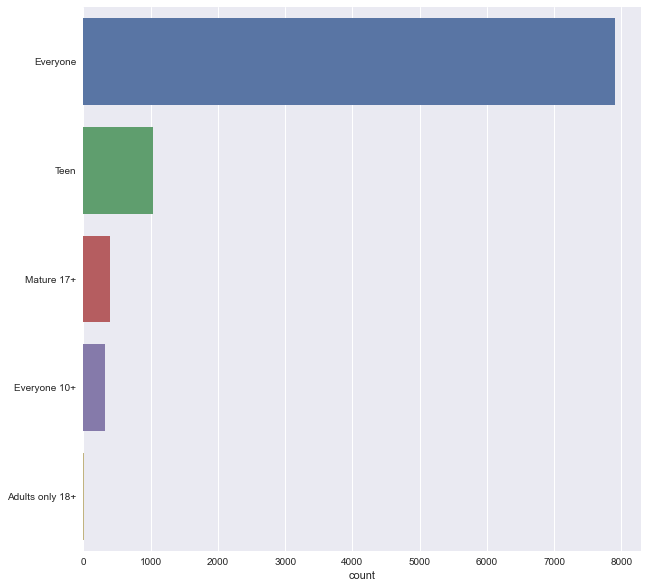

In [1294]:
plt.figure(figsize=(10, 10))
category_dict = dict(df[['content rating']].groupby(
    'content rating')['content rating'].count())
data_plot = dict(sorted(category_dict.items(),
                 key=lambda kv: kv[1], reverse=True))
data_plot = [key for key, val in data_plot.items() for _ in range(val)]
sns.countplot(y=data_plot)
plt.show()

# bar chart


*‡∏à‡∏∞‡πÄ‡∏´‡πá‡∏ô‡πÑ‡∏î‡πâ‡∏ß‡πà‡∏≤ ‡∏Ñ‡∏ß‡∏≤‡∏°‡∏ô‡∏¥‡∏¢‡∏°‡∏™‡πà‡∏ß‡∏ô‡πÉ‡∏´‡∏ç‡πà‡∏ô‡∏±‡πâ‡∏ô ‡∏à‡∏∞‡πÄ‡∏ô‡πâ‡∏ô‡∏ô‡∏¥‡∏¢‡∏°‡πÑ‡∏õ‡∏ó‡∏≤‡∏á‡∏ó‡∏∏‡∏Å‡∏ä‡πà‡∏ß‡∏á‡∏≠‡∏≤‡∏¢‡∏∏‡∏Ñ‡∏ô*

### ‡∏î‡∏π‡∏Ñ‡∏ß‡∏≤‡∏°‡∏ô‡∏¥‡∏¢‡∏°‡∏Ç‡∏≠‡∏á 20 ‡∏≠‡∏±‡∏ô‡∏î‡∏±‡∏ö‡πÅ‡∏£‡∏Å‡∏Ç‡∏≠‡∏á ‡πÅ‡∏ï‡πà‡∏•‡∏∞‡∏´‡∏°‡∏ß‡∏î‡∏´‡∏°‡∏π‡πà

    ‡∏î‡∏π‡∏ß‡πà‡∏≤‡πÅ‡∏ï‡πà‡πÅ‡∏≠‡∏û‡πÅ‡∏ï‡πà‡∏•‡∏∞‡∏´‡∏°‡∏ß‡∏î‡∏´‡∏°‡∏π‡πà‡∏ô‡∏±‡πâ‡∏ô‡∏°‡∏µ‡∏Ñ‡∏ß‡∏≤‡∏°‡∏ô‡∏¥‡∏¢‡∏°‡πÄ‡∏õ‡πá‡∏ô‡∏õ‡∏£‡∏∞‡πÄ‡∏†‡∏ó‡πÑ‡∏´‡∏ô‡∏ã‡∏∞‡∏™‡πà‡∏ß‡∏ô‡πÉ‡∏´‡∏ç‡πà


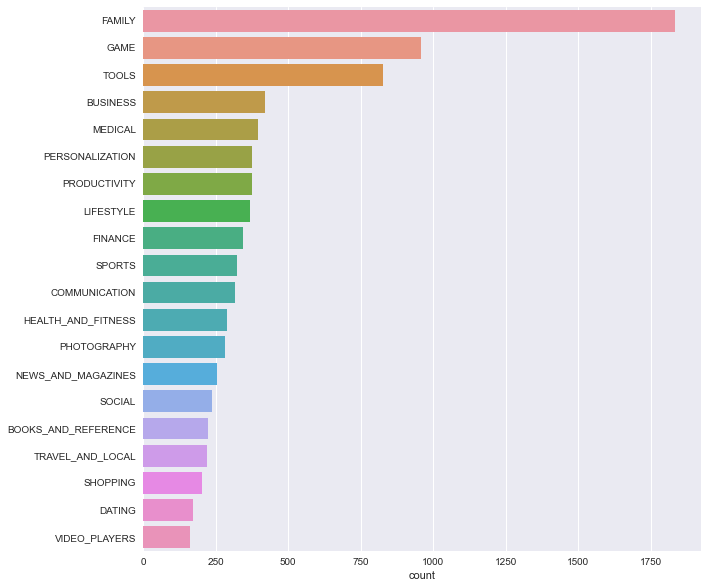

In [1295]:
plt.figure(figsize=(10, 10))
category_dict = dict(df[['category']].groupby(
    'category')['category'].count().nlargest(20))
data_plot = dict(sorted(category_dict.items(),
                 key=lambda kv: kv[1], reverse=True))
data_plot = [key for key, val in data_plot.items() for _ in range(val)]
sns.countplot(y=data_plot)
plt.show()


*‡πÅ‡∏≠‡∏û‡∏´‡∏°‡∏ß‡∏î‡∏´‡∏°‡∏π‡πà FAMILY ‡∏à‡∏∞‡∏°‡∏µ‡πÄ‡∏¢‡∏≠‡∏∞‡∏ó‡∏µ‡πà‡∏™‡∏∏‡∏î ‡πÅ‡∏•‡∏∞ ‡∏ï‡∏≤‡∏°‡∏°‡∏≤‡∏î‡πâ‡∏ß‡∏¢ GAME ‡πÉ‡∏ô Google Play Store*


### ‡∏î‡∏π‡∏Ñ‡∏ß‡∏≤‡∏°‡∏ô‡∏¥‡∏¢‡∏°‡∏Ç‡∏≠‡∏á‡πÅ‡∏ï‡πà‡∏•‡∏∞‡∏õ‡∏£‡∏∞‡πÄ‡∏†‡∏ó‡πÉ‡∏ô‡πÅ‡∏ï‡πà‡∏•‡∏∞‡πÅ‡∏≠‡∏û

    ‡∏î‡∏π‡∏ß‡πà‡∏≤‡πÅ‡∏ï‡πà‡∏•‡∏∞‡πÅ‡∏≠‡∏û‡∏ô‡∏±‡πâ‡∏ô‡∏ô‡∏¥‡∏¢‡∏°‡∏õ‡∏£‡∏∞‡πÄ‡∏†‡∏ó‡πÅ‡∏ö‡∏ö‡πÑ‡∏´‡∏ô‡∏ö‡πâ‡∏≤‡∏á


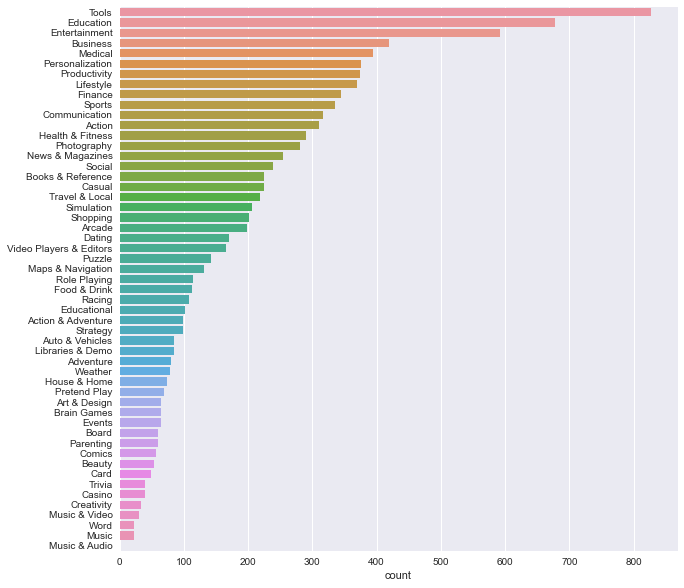

In [1296]:
# ‡∏î‡∏π‡∏Ñ‡∏ß‡∏≤‡∏°‡∏ô‡∏¥‡∏¢‡∏°‡∏Ç‡∏≠‡∏á‡πÅ‡∏ï‡πà‡∏•‡∏∞ tag ‡πÉ‡∏ô‡πÅ‡∏≠‡∏û
plt.figure(figsize=(10, 10))
data_plot = dict(sorted(genres_results.items(),
                 key=lambda kv: kv[1], reverse=True))
data_plot = [key for key, val in data_plot.items() for _ in range(val)]
sns.countplot(y=data_plot)
plt.show()


*‡πÅ‡∏≠‡∏û‡∏õ‡∏£‡∏∞‡πÄ‡∏†‡∏ó Tools ‡∏à‡∏∞‡∏°‡∏µ‡πÄ‡∏¢‡∏≠‡∏∞‡∏ó‡∏µ‡πà‡∏™‡∏∏‡∏î‡πÉ‡∏ô Google Play Store*


### ‡∏î‡∏π‡∏´‡∏°‡∏ß‡∏î‡∏´‡∏°‡∏π‡πÅ‡∏ï‡πà‡∏•‡∏∞‡∏´‡∏°‡∏ß‡∏î‡∏´‡∏°‡∏π‡πà‡∏ß‡πà‡∏≤ ‡∏´‡∏°‡∏ß‡∏î‡∏´‡∏°‡∏π‡πà‡πÑ‡∏´‡∏ô‡∏ô‡∏¥‡∏¢‡∏°‡πÄ‡∏™‡∏µ‡∏¢‡πÄ‡∏á‡∏¥‡∏ô

    ‡πÅ‡∏™‡∏î‡∏á‡∏´‡∏°‡∏ß‡∏î‡∏´‡∏°‡∏π‡∏ó‡∏µ‡πà‡∏ô‡∏¥‡∏¢‡∏°‡πÄ‡∏™‡∏µ‡∏¢‡πÄ‡∏á‡∏¥‡∏ô


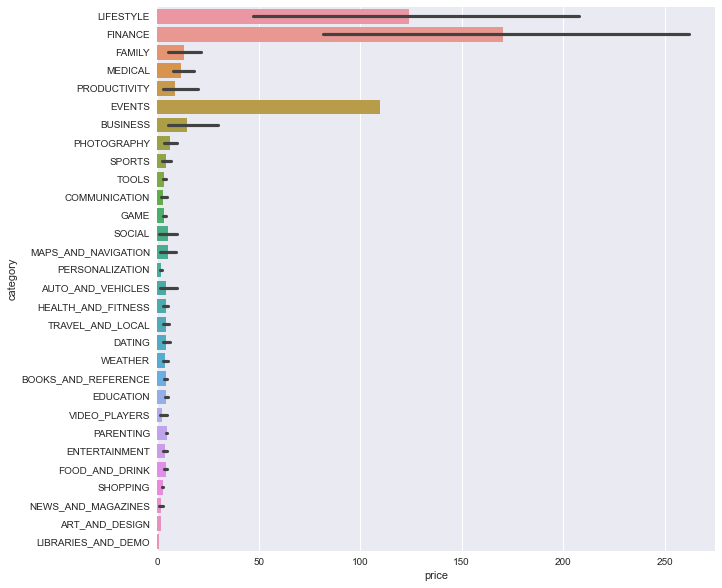

In [1297]:
plt.figure(figsize=(10, 10))
price_sort = df.loc[df.type == 'Paid', ['price', 'category']]
data_plot = dict(price_sort.sort_values(by=['price'], ascending=False))
sns.barplot(data=data_plot, x='price', y='category')
plt.show()


*‡∏à‡∏∞‡πÄ‡∏´‡πá‡∏ô‡πÑ‡∏î‡πâ‡∏ß‡πà‡∏≤ ‡∏´‡∏°‡∏ß‡∏î‡∏´‡∏°‡∏π‡πà LIFT STYLE ‡∏à‡∏∞‡πÅ‡∏û‡∏á‡∏ó‡∏µ‡πà‡∏™‡∏∏‡∏î ‡πÅ‡∏ï‡πà‡∏´‡∏°‡∏ß‡∏î‡∏´‡∏°‡∏π‡πà FINANCE
‡πÅ‡∏≠‡∏û‡∏™‡πà‡∏ß‡∏ô‡πÉ‡∏´‡∏ç‡πà‡πÅ‡∏ô‡πà‡∏ô‡πÄ‡∏õ‡πá‡∏ô‡πÅ‡∏≠‡∏û‡πÄ‡∏™‡∏µ‡∏¢‡πÄ‡∏á‡∏¥‡∏ô*


<a id='feature_engineering'></a>

## **Feature Engineering**

#### ‡πÄ‡∏£‡∏≤‡∏à‡∏∞‡∏ó‡∏≥‡πÉ‡∏ô‡πÄ‡∏£‡∏∑‡πà‡∏≠‡∏á‡∏Ç‡∏≠‡∏á App Recommendation
- ‡πÄ‡∏£‡∏≤‡∏à‡∏∞‡πÉ‡∏ä‡πâ‡∏ï‡∏±‡∏ß CountVectorizer ‡πÄ‡∏û‡∏£‡∏≤‡∏∞‡πÄ‡∏£‡∏≤‡∏à‡∏∞‡πÉ‡∏ä‡πâ‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏ó‡∏µ‡πà‡πÉ‡∏ä‡πâ‡πÉ‡∏ô‡∏Å‡∏≤‡∏£‡∏Ñ‡πâ‡∏ô‡∏´‡∏≤‡πÄ‡∏õ‡πá‡∏ô‡∏´‡∏•‡∏±‡∏Å‡πÜ

In [1298]:
# ‡πÄ‡∏£‡∏µ‡∏¢‡∏Å‡πÉ‡∏ä‡πâ‡∏ï‡∏±‡∏ß CountVectorizer
count_vectorizer = CountVectorizer(lowercase=True, stop_words='english')
tfidf_vectorizer = TfidfVectorizer(lowercase=True, stop_words='english')


*‡πÅ‡∏ï‡πà‡∏Å‡πà‡∏≠‡∏ô‡∏≠‡∏∑‡πà‡∏ô‡πÄ‡∏£‡∏≤‡∏ï‡πâ‡∏≠‡∏á‡∏à‡∏±‡∏î‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡πÉ‡∏´‡∏°‡πà‡∏Å‡πà‡∏≠‡∏ô ‡πÉ‡∏´‡πâ ‡∏ï‡∏±‡∏ß CountVectorizer ‡∏à‡∏∞‡πÑ‡∏î‡πâ‡πÅ‡∏ö‡πà‡∏á‡∏Ñ‡∏≥‡∏á‡πà‡∏≤‡∏¢‡πÜ*

- ‡πÄ‡∏£‡∏≤‡∏à‡∏∞‡∏ï‡∏±‡∏î‡∏õ‡∏£‡∏∞‡πÄ‡∏†‡∏ó‡πÅ‡∏•‡∏∞‡∏´‡∏°‡∏ß‡∏î‡∏´‡∏°‡∏π‡πà‡∏ó‡∏µ‡πà‡∏ã‡πâ‡∏≥‡∏≠‡∏≠‡∏Å

In [1299]:
# ‡∏™‡∏£‡πâ‡∏≤‡∏á‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏Ç‡∏≠‡∏á content


def construct_content(x: str):
    join_genres = "".join(x.split(' '))
    join_category = "".join(join_genres.upper().split('_AND_'))

    results = []

    for i in join_category.split(';'):
        if i not in results:
            results.append(i)

    return ";".join(results)


describe = (df['genres'].replace(to_replace='(;|&| +)', value=' ',
            regex=True) + ";" + df['category'] + ";" + df['content rating'] + ";" + df['type']).apply(lambda x: construct_content(x))
describe.sample(5)


5780    EDUCATIONAL;FAMILY;EVERYONE;FREE
9310           PERSONALIZATION;TEEN;FREE
8448                 CARD;GAME;TEEN;FREE
6231         HEALTHFITNESS;EVERYONE;FREE
4942      EDUCATION;FAMILY;EVERYONE;FREE
dtype: object

In [1300]:
# ‡∏™‡∏£‡πâ‡∏≤‡∏á‡∏ï‡∏±‡∏ß matrix ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö content ‡∏ó‡∏µ‡πà‡πÉ‡∏ä‡πâ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏ó‡∏µ‡πà‡∏Ñ‡∏•‡πâ‡∏≤‡∏¢‡πÜ‡∏Å‡∏±‡∏ô
time_start = time.time()
cosine_similarity
content_count_matrix = count_vectorizer.fit_transform(describe)
content_cosine_sim = linear_kernel(
    content_count_matrix, content_count_matrix)
content_count_matrix.shape
time_end = time.time()
print(f"Content Similarity : {round(time_end - time_start, 2)} second")


Content Similarity : 0.87 second


In [1301]:
# ‡∏™‡∏£‡πâ‡∏≤‡∏á‡∏ï‡∏±‡∏ß matrix ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö content ‡∏ó‡∏µ‡πà‡∏Ñ‡∏•‡πâ‡∏≤‡∏¢‡πÅ‡∏Å‡∏±‡∏ô ‡πÇ‡∏î‡∏¢‡πÑ‡∏°‡πà‡∏™‡∏ô‡∏ß‡πà‡∏≤‡∏à‡πà‡∏≤‡∏¢‡πÄ‡∏á‡∏¥‡∏ô‡∏´‡∏£‡∏∑‡∏≠‡πÑ‡∏°‡πà‡∏à‡πà‡∏≤‡∏¢
time_start = time.time()
type_count_matrix = tfidf_vectorizer.fit_transform((df['genres'].replace(
    to_replace='(;|&| +)', value=' ', regex=True)+';' + df['category']).apply(lambda x: construct_content(x)))
type_cosine_sim = linear_kernel(type_count_matrix, type_count_matrix)
type_count_matrix.shape
time_end = time.time()
print(f"Type Similarity : {round(time_end - time_start, 2)} second")


Type Similarity : 0.3 second


In [1302]:
# ‡∏™‡∏£‡πâ‡∏≤‡∏á‡∏ï‡∏±‡∏ß matrix ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö ‡∏ä‡∏∑‡πà‡∏≠‡πÅ‡∏≠‡∏û‡∏ó‡∏µ‡πà‡∏Ñ‡∏•‡πâ‡∏≤‡∏¢‡πÜ ‡∏Å‡∏µ‡∏ô
time_start = time.time()
name_count_matrix = tfidf_vectorizer.fit_transform(
    (df['category']+';' + df['app']))
name_cosine_sim = linear_kernel(name_count_matrix, name_count_matrix)
name_count_matrix.shape
time_end = time.time()
print(f"Name Similarity : {round(time_end - time_start, 2)} second")


Name Similarity : 0.39 second


In [1303]:
class Recommendations:
    def __init__(self, name: str, amount: int = 10):
        self.name = self.nearest_name(name)
        self.amount = amount

    def nearest_name(self, name: str):
        close = self.get_close_matches(name)
        get_sr = df['app'][df['app'].isin([name])]
        if len(get_sr) != 0:
            return get_sr.iloc[0]
        elif close:
            return close[0]
        return None

    def get_close_matches(self, name: str):
        global df
        get_sr2 = df['app'][df['app'].apply(
            lambda x: x.lower()).str.contains(name.lower())]
        if len(get_sr2) != 0:
            return get_sr2.tolist()
        return []

    def get_indices(self):
        metadata = df.reset_index()
        indices = pd.Series(metadata.index, index=metadata['app'])
        if not self.name:
            return None
        return indices[self.name]

    def get_recommendations(self, cosine_sim=content_cosine_sim):
        indice = self.get_indices()
        if not indice:
            return 'No name was near'
        sim_scores = list(enumerate(cosine_sim[indice]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        sim_scores = sim_scores[0:self.amount + 1]
        _indices = [i[0] for i in sim_scores]

        recs = df[['app', 'genres', 'category', 'type', 'content rating']].iloc[_indices]
        recs['match_score'] = [i[1] for i in sim_scores]
        recs['match_score'] = recs['match_score'].apply(lambda x: round(x, 4))
        recs = recs.loc[recs.app != self.name]
        return recs.loc[recs.match_score > 0, ['app', 'genres', 'category', 'type', 'content rating', 'match_score']]

    def get_app_detail(self):
        return df.loc[df['app'] == self.name, ['app', 'genres', 'category', 'type', 'content rating']]


In [1304]:
# construct ‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡πÅ‡∏≠‡∏û ‡∏à‡∏≤‡∏Å‡∏ä‡∏∑‡πà‡∏≠‡∏ó‡∏µ‡πà‡πÉ‡∏´‡πâ‡πÑ‡∏õ
recommend = Recommendations('Bacterial Vaginosis')

# ‡πÅ‡∏™‡∏î‡∏á‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡πÅ‡∏≠‡∏û‡∏ó‡∏µ‡πà‡πÉ‡∏Å‡∏•‡πâ‡πÄ‡∏Ñ‡∏µ‡∏¢‡∏á‡∏Å‡∏±‡∏ö‡∏ä‡∏∑‡πà‡∏≠‡∏°‡∏≤‡∏Å‡∏ó‡∏µ‡πà‡∏™‡∏∏‡∏î‡∏°‡∏≤‡πÅ‡∏™‡∏î‡∏á
recommend.get_app_detail()


app            genres            category  type  \
5821  Bacterial Vaginosis  Health & Fitness  HEALTH_AND_FITNESS  Free   

     content rating  
5821       Everyone

*‡∏à‡∏∞‡πÑ‡∏î‡πâ‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡πÉ‡∏Å‡∏•‡πâ‡πÄ‡∏Ñ‡∏µ‡∏¢‡∏á‡∏Å‡∏±‡∏ö‡πÅ‡∏≠‡∏û‡∏ó‡∏µ‡πà‡πÄ‡∏£‡∏≤‡∏Ñ‡πâ‡∏ô‡∏´‡∏≤‡∏°‡∏≤‡∏Å‡∏ó‡∏µ‡πà‡∏™‡∏∏‡∏î*
- column ‡∏ó‡∏µ‡πà‡πÉ‡∏ä‡πâ category, genres, type,content rating
- ‡∏à‡∏∞‡∏ô‡∏≥‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏ó‡∏µ‡πà‡πÑ‡∏î‡πâ ‡πÅ‡∏ô‡∏∞‡∏ô‡∏≥‡∏•‡∏π‡∏Å‡∏Ñ‡πâ‡∏≤

In [1305]:
time_start = time.time()
recommendation = recommend.get_recommendations()
time_end = time.time()

print(f"Content Recommendation : {time_end - time_start}")


Content Recommendation : 0.007506370544433594


In [1306]:
recommendation

app            genres  \
1027                        Home Workout - No Equipment  Health & Fitness   
1028                     Step Counter - Calorie Counter  Health & Fitness   
1029           Lose Belly Fat in 30 Days - Flat Stomach  Health & Fitness   
1030     Pedometer - Step Counter Free & Calorie Burner  Health & Fitness   
1031                  Six Pack in 30 Days - Abs Workout  Health & Fitness   
1032                             Lose Weight in 30 Days  Health & Fitness   
1033                                          Pedometer  Health & Fitness   
1034                                          LG Health  Health & Fitness   
1035    Step Counter - Pedometer Free & Calorie Counter  Health & Fitness   
1036  Pedometer, Step Counter & Weight Loss Tracker App  Health & Fitness   
1037  Sportractive GPS Running Cycling Distance Tracker  Health & Fitness   

                category  type content rating  match_score  
1027  HEALTH_AND_FITNESS  Free       Everyone          2.0  
1028  HEALTH_AND_FITNESS  Free       Everyone          2.0  
1029  HEALTH_AND_FITNESS  Free       Everyone          2.0  
1030  HEALTH_AND_FITNESS  Free       Everyone          2.0  
1031  HEALTH_AND_FITNESS  Free       Everyone          2.0  
1032  HEALTH_AND_FITNESS  Free       Everyone          2.0  
1033  HEALTH_AND_FITNESS  Free       Everyone          2.0  
1034  HEALTH_AND_FITNESS  Free       Everyone          2.0  
1035  HEALTH_AND_FITNESS  Free       Everyone          2.0  
1036  HEALTH_AND_FITNESS  Free       Everyone          2.0  
1037  HEALTH_AND_FITNESS  Free       Everyone          2.0

- ‡πÅ‡∏ô‡∏∞‡∏ô‡∏≥‡πÅ‡∏≠‡∏û‡∏ó‡∏µ‡πà‡∏ä‡∏∑‡πà‡∏≠‡∏Å‡∏±‡∏ö‡∏´‡∏°‡∏ß‡∏î‡∏´‡∏°‡∏π‡πà‡πÉ‡∏Å‡∏•‡πâ‡πÄ‡∏Ñ‡∏µ‡∏¢‡∏á
- column ‡∏ó‡∏µ‡πà‡πÉ‡∏ä‡πâ app, category

In [1307]:
time_start = time.time()
recommendation = recommend.get_recommendations(name_cosine_sim)
time_end = time.time()
print(f"Name Recommendation : {time_end - time_start}")


Name Recommendation : 0.006505727767944336


In [1308]:
recommendation

app            genres  \
5822                          Bacterial Vaginosis üá∫üá∏  Health & Fitness   
5840                             bacterial vaginosis           Medical   
5828                    Bacterial Vaginosis Symptoms           Medical   
5833                   Bacterial Vaginosis Treatment           Medical   
5823        Bacterial Vaginosis Symptoms & Treatment           Medical   
5831  Bacterial vaginosis Treatment - Sexual disease  Health & Fitness   
5824                              Bacteria Vaginosis  Health & Fitness   
5860          Home Remedies for Bacterial Infections  Health & Fitness   
6820                                       I AM C.T.  Health & Fitness   
4214                                           be'ah  Health & Fitness   

                category  type content rating  match_score  
5822  HEALTH_AND_FITNESS  Free           Teen       1.0000  
5840             MEDICAL  Free           Teen       0.8704  
5828             MEDICAL  Free   Everyone 10+       0.7222  
5833             MEDICAL  Free       Everyone       0.7185  
5823             MEDICAL  Free       Everyone       0.6282  
5831  HEALTH_AND_FITNESS  Free       Everyone       0.6213  
5824  HEALTH_AND_FITNESS  Free     Mature 17+       0.5241  
5860  HEALTH_AND_FITNESS  Free       Everyone       0.3952  
6820  HEALTH_AND_FITNESS  Free     Mature 17+       0.3711  
4214  HEALTH_AND_FITNESS  Free       Everyone       0.2168

*‡πÅ‡∏™‡∏î‡∏•‡∏á‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏ó‡∏µ‡∏µ‡πà‡πÉ‡∏Å‡∏•‡πâ‡πÄ‡∏Ñ‡∏µ‡∏¢‡∏á‡∏Å‡∏±‡∏ö‡∏ä‡∏∑‡πà‡∏≠‡∏´‡∏•‡∏±‡∏Å‡∏ó‡∏µ‡πà‡πÄ‡∏£‡∏≤‡πÑ‡∏î‡πâ‡∏°‡∏≤*

#### ‡πÅ‡∏™‡∏î‡∏á‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏• content ‡∏ó‡∏µ‡πà‡πÉ‡∏Å‡∏•‡πâ‡πÄ‡∏Ñ‡∏µ‡∏¢‡∏á‡∏ó‡∏µ‡πà‡∏™‡∏∏‡∏î ‡∏Ç‡∏≠‡∏á‡πÅ‡∏≠‡∏û‡∏ó‡∏µ‡πà‡πÑ‡∏î‡πâ‡∏°‡∏≤‡πÅ‡∏™‡∏î‡∏á ‡πÇ‡∏î‡∏¢‡πÑ‡∏°‡πà‡∏™‡∏ô‡∏ß‡πà‡∏≤‡πÄ‡∏™‡∏µ‡∏¢‡πÄ‡∏á‡∏¥‡∏ô‡∏´‡∏£‡∏∑‡∏≠‡πÑ‡∏°‡πà ‡∏Å‡∏±‡∏ö ‡πÑ‡∏°‡πà‡∏™‡∏ô‡∏ä‡πà‡∏ß‡∏á‡∏≠‡∏≤‡∏¢‡∏∏
- ‡∏ï‡∏≤‡∏£‡∏≤‡∏á‡∏ó‡∏µ‡πà‡πÉ‡∏ä‡πâ‡∏à‡∏∞‡∏°‡∏µ genres, category

In [1309]:
time_start = time.time()
recommendation = recommend.get_recommendations(type_cosine_sim)
time_end = time.time()
print(f"Might Be Recommendation : {time_end - time_start}")


Might Be Recommendation : 0.007006406784057617


In [1310]:
recommendation


app            genres  \
1027                        Home Workout - No Equipment  Health & Fitness   
1028                     Step Counter - Calorie Counter  Health & Fitness   
1029           Lose Belly Fat in 30 Days - Flat Stomach  Health & Fitness   
1030     Pedometer - Step Counter Free & Calorie Burner  Health & Fitness   
1031                  Six Pack in 30 Days - Abs Workout  Health & Fitness   
1032                             Lose Weight in 30 Days  Health & Fitness   
1033                                          Pedometer  Health & Fitness   
1034                                          LG Health  Health & Fitness   
1035    Step Counter - Pedometer Free & Calorie Counter  Health & Fitness   
1036  Pedometer, Step Counter & Weight Loss Tracker App  Health & Fitness   
1037  Sportractive GPS Running Cycling Distance Tracker  Health & Fitness   

                category  type content rating  match_score  
1027  HEALTH_AND_FITNESS  Free       Everyone          1.0  
1028  HEALTH_AND_FITNESS  Free       Everyone          1.0  
1029  HEALTH_AND_FITNESS  Free       Everyone          1.0  
1030  HEALTH_AND_FITNESS  Free       Everyone          1.0  
1031  HEALTH_AND_FITNESS  Free       Everyone          1.0  
1032  HEALTH_AND_FITNESS  Free       Everyone          1.0  
1033  HEALTH_AND_FITNESS  Free       Everyone          1.0  
1034  HEALTH_AND_FITNESS  Free       Everyone          1.0  
1035  HEALTH_AND_FITNESS  Free       Everyone          1.0  
1036  HEALTH_AND_FITNESS  Free       Everyone          1.0  
1037  HEALTH_AND_FITNESS  Free       Everyone          1.0

<a id='modelling'></a>

## **Modelling**

> ‡∏™‡∏¥‡πà‡∏á‡∏ó‡∏µ‡πà‡πÄ‡∏£‡∏≤‡∏à‡∏∞‡∏ó‡∏≥‡∏Ñ‡∏∑‡∏≠ ‡∏Ñ‡πâ‡∏ô‡∏´‡∏≤‡πÅ‡∏≠‡∏û‡∏ó‡∏µ‡πà‡πÉ‡∏Å‡∏•‡πâ‡πÄ‡∏Ñ‡∏µ‡∏ö‡∏á‡∏Å‡∏±‡∏ö‡∏Ñ‡πâ‡∏ô‡∏´‡∏≤‡∏°‡∏≤‡∏Å‡∏ó‡∏µ‡πà‡∏™‡∏∏‡∏î‡∏°‡∏≤‡∏Å‡πà‡∏≠‡∏ô  
> ‡∏´‡∏•‡∏±‡∏á‡∏à‡∏≤‡∏Å‡∏ô‡∏±‡πâ‡∏ô ‡∏à‡∏∞‡∏ô‡∏≥‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏™‡πà‡∏ß‡∏ô‡∏ô‡∏±‡πâ‡∏ô‡∏°‡∏≤‡πÅ‡∏ô‡∏∞‡∏ô‡∏≥ ‡∏à‡∏∞‡∏°‡∏µ‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏≠‡∏¢‡∏π‡πà 3 ‡∏≠‡∏¢‡πà‡∏≤‡∏á
>
> -   ‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏ó‡∏µ‡πà‡πÉ‡∏Å‡∏•‡πâ‡πÄ‡∏Ñ‡∏µ‡∏¢‡∏á‡∏°‡∏≤‡∏Å‡∏ó‡∏µ‡πà‡∏™‡∏∏‡∏î
> -   ‡∏ï‡πâ‡∏≠‡∏á‡∏Å‡∏≤‡∏£‡∏à‡∏∞‡πÅ‡∏ô‡∏∞‡∏ô‡∏≥‡∏ä‡∏∑‡πà‡∏≠‡∏ó‡∏µ‡πà‡πÉ‡∏Å‡∏•‡πâ‡πÄ‡∏Ñ‡∏µ‡∏¢‡∏á‡∏Å‡∏±‡∏ö‡πÅ‡∏≠‡∏û‡∏´‡∏•‡∏±‡∏Å
> -   ‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡πÄ‡∏´‡∏°‡∏∑‡∏≠‡∏ô‡∏Å‡∏±‡∏ô‡∏ã‡∏∂‡∏á‡πÑ‡∏°‡πà‡∏™‡∏ô‡∏ß‡πà‡∏≤‡∏à‡∏∞‡πÄ‡∏õ‡πá‡∏ô‡πÅ‡∏≠‡∏û‡∏ü‡∏£‡∏µ‡∏´‡∏£‡∏∑‡∏≠‡πÑ‡∏°‡πà‡∏ü‡∏£‡∏µ

### **Benchmark**

‡πÄ‡∏£‡∏≤‡∏à‡∏∞‡∏ó‡∏î‡∏™‡∏≠‡∏ö‡πÇ‡∏î‡∏¢‡πÉ‡∏ä‡πâ‡∏ï‡∏±‡∏ß TfidfVectorizer ‡πÅ‡∏•‡∏∞ CountVectorizer

‡πÇ‡∏î‡∏¢ ‡πÄ‡∏£‡∏≤‡∏à‡∏∞‡∏•‡∏≠‡∏á‡πÉ‡∏ä‡πâ‡∏Ç‡∏≠‡∏á TfidfVectorizer ‡πÅ‡∏•‡∏∞ CountVectorizer ‡πÇ‡∏î‡∏¢‡πÉ‡∏ä‡πâ‡∏£‡∏π‡∏õ‡πÅ‡∏ö‡∏ö cosine
similarity ‡∏Å‡πà‡∏≠‡∏ô‡∏Ç‡∏≠‡∏á‡∏ó‡∏±‡πâ‡∏á‡∏™‡∏≠‡∏á‡∏£‡∏π‡∏õ‡πÅ‡∏ö‡∏ö

‡πÉ‡∏ô‡∏Å‡∏≤‡∏£ benchmark ‡πÄ‡∏£‡∏≤‡∏à‡∏∞‡∏ó‡∏î‡∏™‡∏≠‡∏ö‡∏ó‡∏±‡πâ‡∏á‡∏™‡∏≤‡∏°‡∏£‡∏π‡∏õ‡πÅ‡∏ö‡∏ö‡∏≠‡∏≠‡∏Å‡∏°‡∏≤

### **1. Content Recommendation**

-   #### ‡πÄ‡∏£‡∏≤‡∏à‡∏∞‡∏ó‡∏î‡∏™‡∏≠‡∏ö‡∏ó‡∏±‡πâ‡∏á TfidfVectorizer ‡πÅ‡∏•‡∏∞ CountVectorizer ‡∏Å‡πà‡∏≠‡∏ô

<div>
    <h3><b>CountVectorizer</b></h3>
    <img src="./images/count_cousine_content_recommendation.png" />
<div>
<div>
    <h3><b>TfidfVectorizer</b></h3>
    <img src="./images/tfidf_cousine_content_recommendation.png" />
<div>

-   ‡πÉ‡∏ô‡∏™‡πà‡∏ß‡∏ô‡∏Ç‡∏≠‡∏á‡∏•‡∏≥‡∏î‡∏±‡∏ö‡∏ô‡∏±‡πâ‡∏ô ‡πÄ‡∏´‡∏°‡∏∑‡∏≠‡∏ô‡∏Å‡∏±‡∏ô‡∏ó‡∏±‡πâ‡∏á‡∏´‡∏°‡∏î
-   ‡πÉ‡∏ô‡∏™‡πà‡∏ß‡∏ô‡∏ñ‡∏±‡∏î‡πÑ‡∏õ‡πÄ‡∏£‡∏≤‡∏à‡∏∞‡∏°‡∏≤‡∏ó‡∏î‡∏™‡∏≠‡∏ö Performance ‡∏Å‡∏±‡∏ô‡πÅ‡∏ó‡∏ô
-   ‡∏à‡∏≤‡∏Å‡∏Å‡∏≤‡∏£‡∏ó‡∏î‡∏™‡∏≠‡∏ö‡∏ô‡∏±‡πâ‡∏ô
    -   TfidfVectorizer ‡∏ó‡∏≥‡πÄ‡∏ß‡∏•‡∏≤‡πÑ‡∏õ ¬¨0.0085 s.
    -   CountVectorizer ‡∏ó‡∏≥‡πÄ‡∏ß‡∏•‡∏≤‡πÑ‡∏õ ¬¨0.0080 s.
-   ‡∏™‡∏£‡∏∏‡∏õ‡πÑ‡∏î‡πâ‡∏ß‡πà‡∏≤ ‡πÄ‡∏£‡∏≤‡∏à‡∏∞‡πÉ‡∏ä‡πâ‡∏ï‡∏±‡∏ß **CountVectorizer** ‡πÅ‡∏ó‡∏ô

### **2. Type Recommendation**

-   #### ‡πÄ‡∏£‡∏≤‡∏à‡∏∞‡∏ó‡∏î‡∏™‡∏≠‡∏ö‡∏ó‡∏±‡πâ‡∏á TfidfVectorizer ‡πÅ‡∏•‡∏∞ CountVectorizer ‡∏Å‡πà‡∏≠‡∏ô

<div>
    <h3><b>CountVectorizer</b></h3>
    <img src="./images/count_cousine_type_recommendation.png" />
<div>
<div>
    <h3><b>TfidfVectorizer</b></h3>
    <img src="./images/tfidf_cousine_type_recommendation.png" />
<div>

-   ‡πÉ‡∏ô‡∏™‡πà‡∏ß‡∏ô‡∏Ç‡∏≠‡∏á‡∏•‡∏≥‡∏î‡∏±‡∏ö‡∏ô‡∏±‡πâ‡∏ô ‡πÄ‡∏´‡∏°‡∏∑‡∏≠‡∏ô‡∏Å‡∏±‡∏ô‡∏ó‡∏±‡πâ‡∏á‡∏´‡∏°‡∏î
-   ‡πÉ‡∏ô‡∏™‡πà‡∏ß‡∏ô‡∏Ç‡∏≠‡∏á Performance ‡∏à‡∏≤‡∏Å‡∏Å‡∏≤‡∏£‡∏ó‡∏î‡∏™‡∏≠‡∏ö‡∏ô‡∏±‡πâ‡∏ô
    -   TfidfVectorizer ‡∏ó‡∏≥‡πÄ‡∏ß‡∏•‡∏≤‡πÑ‡∏õ ¬¨0.0065 s.
    -   CountVectorizer ‡∏ó‡∏≥‡πÄ‡∏ß‡∏•‡∏≤‡πÑ‡∏õ ¬¨0.0070 s.
-   ‡∏™‡∏£‡∏∏‡∏õ‡πÑ‡∏î‡πâ‡∏ß‡πà‡∏≤ ‡πÄ‡∏£‡∏≤‡∏à‡∏∞‡πÉ‡∏ä‡πâ‡∏ï‡∏±‡∏ß **TfidfVectorizer** ‡πÅ‡∏ó‡∏ô

### **3. App Name Recommendation**

-   #### ‡πÄ‡∏£‡∏≤‡∏à‡∏∞‡∏ó‡∏î‡∏™‡∏≠‡∏ö‡∏ó‡∏±‡πâ‡∏á TfidfVectorizer ‡πÅ‡∏•‡∏∞ CountVectorizer ‡∏Å‡πà‡∏≠‡∏ô

<div>
    <h3><b>CountVectorizer</b></h3>
    <img src="./images/count_cousine_name_recommendation.png" />
<div>
<div>
    <h3><b>TfidfVectorizer</b></h3>
    <img src="./images/tfidf_cousine_name_recommendation.png" />
<div>

-   ‡∏à‡∏∞‡∏™‡∏±‡πà‡∏á‡πÄ‡∏Å‡∏ï‡∏∏‡πÑ‡∏î‡πâ‡∏ß‡πà‡∏≤ ‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏Ç‡∏≠‡∏á‡∏ó‡∏±‡πâ‡∏á‡∏™‡∏≠‡∏á‡∏ô‡∏±‡πâ‡∏ô‡πÑ‡∏°‡πà‡∏ï‡∏£‡∏á‡∏Å‡∏±‡∏ô‡πÄ‡∏•‡∏¢
-   ‡∏à‡∏≤‡∏Å‡∏†‡∏≤‡∏û‡∏£‡∏ß‡∏°‡πÅ‡∏•‡πâ‡∏ß ‡∏ï‡∏±‡∏ß TfidfVectorizer ‡∏à‡∏∞‡πÅ‡∏°‡πà‡∏ô‡∏¢‡∏≥‡∏Å‡∏ß‡πà‡∏≤ ‡∏ï‡∏£‡∏á‡∏ó‡∏µ‡πà‡∏ß‡πà‡∏≤
    -   ‡∏ï‡∏±‡∏ß Count ‡∏ô‡∏±‡πâ‡∏ô‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏ö‡∏ô‡πÜ ‡∏à‡∏∞‡πÄ‡∏´‡∏°‡∏∑‡∏≠‡∏ô‡πÅ‡∏•‡∏∞‡∏î‡∏µ‡∏Å‡πá‡∏à‡∏£‡∏¥‡∏á ‡πÅ‡∏à‡∏∞‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏´‡∏•‡∏±‡∏á‡πÜ
        ‡πÄ‡∏´‡∏°‡∏∑‡∏≠‡∏ô‡∏à‡∏∞‡πÑ‡∏°‡πà‡∏ï‡∏£‡∏á‡πÄ‡∏•‡∏¢
    -   ‡∏™‡πà‡∏ß‡∏ô‡∏ï‡∏±‡∏ß Tfidf ‡∏ô‡∏±‡πâ‡∏ô‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏à‡∏∞‡∏Ñ‡πà‡∏≠‡∏ô‡∏Ç‡πâ‡∏≤‡∏á‡πÄ‡∏™‡∏ñ‡∏µ‡∏¢‡∏£‡πÅ‡∏•‡∏∞‡πÄ‡∏£‡∏µ‡∏¢‡∏á‡πÑ‡∏î‡πâ‡∏î‡∏µ‡∏Å‡∏ß‡πà‡∏≤
-   ‡πÉ‡∏ô‡∏™‡πà‡∏ß‡∏ô‡∏Ç‡∏≠‡∏á app name recommendation ‡∏ô‡∏±‡πâ‡∏ô ‡πÄ‡∏£‡∏≤‡∏à‡∏∞‡πÉ‡∏ä‡πâ‡∏ï‡∏±‡∏ß‡∏Ç‡∏≠‡∏á TfidfVectorizer

### ‡∏™‡πà‡∏ß‡∏ô‡∏Ç‡∏≠‡∏á Similarity

-   ‡πÉ‡∏ô‡∏ó‡∏µ‡πà‡∏ô‡∏µ‡πâ‡πÄ‡∏£‡∏≤‡∏°‡∏µ‡∏≠‡∏¢‡∏π‡πà‡∏™‡∏≠‡∏á‡∏ï‡∏±‡∏ß ‡∏Å‡πá‡∏Ñ‡∏∑‡∏≠ Linear kernel ‡∏Å‡∏±‡∏ö Cosine similarity
-   ‡πÄ‡∏£‡∏≤‡∏à‡∏∞‡∏ó‡∏≥‡∏Å‡∏≤‡∏£‡∏ó‡∏î‡∏™‡∏≠‡∏ö Performance ‡∏ô‡∏±‡πâ‡∏ô‡πÜ

### **1. Content Recommendation**

-   ‡πÄ‡∏£‡∏≤‡∏à‡∏∞‡∏°‡∏≤‡∏î‡∏π‡πÉ‡∏ô‡∏Ñ‡∏ß‡∏≤‡∏°‡πÅ‡∏°‡πà‡∏ô‡∏¢‡∏≥‡∏Ç‡∏≠‡∏á similarity
<div>
    <h3><b>Cosine Similarity</b></h3>
    <img src="./images/count_cousine_content_recommendation.png" />
<div>
<div>
    <h3><b>Linear Kernel</b></h3>
    <img src="./images/count_linear_content_recommendation.png" />
<div>

_‡∏ó‡∏±‡πâ‡∏á‡∏™‡∏≠‡∏á‡∏ï‡∏±‡∏ß‡∏ô‡∏±‡πâ‡∏ô ‡πÉ‡∏´‡πâ‡∏ú‡∏•‡∏•‡∏±‡∏û‡πÄ‡∏´‡∏°‡∏∑‡∏≠‡∏ô‡∏Å‡∏±‡∏ô_

-   ‡πÄ‡∏£‡∏≤‡πÄ‡∏•‡∏¢‡∏à‡∏∞‡∏°‡∏≤‡∏ó‡∏î‡∏™‡∏≠‡∏ö‡πÉ‡∏ô‡∏™‡πà‡∏ß‡∏ô‡∏Ç‡∏≠‡∏á Performance ‡∏Å‡∏±‡∏ô
    -   linear kernal ‡πÑ‡∏î‡πâ‡∏ó‡∏µ‡πà ¬¨0.96 s
    -   cosine similarity ‡πÑ‡∏î‡πâ‡∏ó‡∏µ‡πà ¬¨0.87 s

#### ‡∏Ç‡∏≠‡∏á‡∏ï‡∏±‡∏ß‡∏ô‡∏µ‡πâ‡πÄ‡∏£‡∏≤‡∏ï‡∏±‡∏î‡∏™‡∏¥‡∏ô‡πÉ‡∏à‡πÉ‡∏ä‡πâ **Cosine Similarity**


### **2. Type Recommendation**

-   ‡πÄ‡∏£‡∏≤‡∏à‡∏∞‡∏°‡∏≤‡∏î‡∏π‡πÉ‡∏ô‡∏Ñ‡∏ß‡∏≤‡∏°‡πÅ‡∏°‡πà‡∏ô‡∏¢‡∏≥‡∏Ç‡∏≠‡∏á similarity
<div>
    <h3><b>Cosine Similarity</b></h3>
    <img src="./images/tfidf_cousine_type_recommendation.png" />
<div>
<div>
    <h3><b>Linear Kernel</b></h3>
    <img src="./images/tfidf_linear_type_recommendation.png" />
<div>

_‡∏ó‡∏±‡πâ‡∏á‡∏™‡∏≠‡∏á‡∏ï‡∏±‡∏ß‡∏ô‡∏±‡πâ‡∏ô ‡πÉ‡∏´‡πâ‡∏ú‡∏•‡∏•‡∏±‡∏û‡πÄ‡∏´‡∏°‡∏∑‡∏≠‡∏ô‡∏Å‡∏±‡∏ô_

-   ‡πÄ‡∏£‡∏≤‡πÄ‡∏•‡∏¢‡∏à‡∏∞‡∏°‡∏≤‡∏ó‡∏î‡∏™‡∏≠‡∏ö‡πÉ‡∏ô‡∏™‡πà‡∏ß‡∏ô‡∏Ç‡∏≠‡∏á Performance ‡∏Å‡∏±‡∏ô
    -   linear kernal ‡πÑ‡∏î‡πâ‡∏ó‡∏µ‡πà ¬¨0.29 s
    -   cosine similarity ‡πÑ‡∏î‡πâ‡∏ó‡∏µ‡πà ¬¨0.32 s

#### ‡∏Ç‡∏≠‡∏á‡∏ï‡∏±‡∏ß‡∏ô‡∏µ‡πâ‡πÄ‡∏£‡∏≤‡∏ï‡∏±‡∏î‡∏™‡∏¥‡∏ô‡πÉ‡∏à‡πÉ‡∏ä‡πâ **Linear Kernal**

### **3. App Name Recommendation**

-   ‡πÄ‡∏£‡∏≤‡∏à‡∏∞‡∏°‡∏≤‡∏î‡∏π‡πÉ‡∏ô‡∏Ñ‡∏ß‡∏≤‡∏°‡πÅ‡∏°‡πà‡∏ô‡∏¢‡∏≥‡∏Ç‡∏≠‡∏á similarity
<div>
    <h3><b>Cosine Similarity</b></h3>
    <img src="./images/tfidf_cousine_name_recommendation.png" />
<div>
<div>
    <h3><b>Linear Kernel</b></h3>
    <img src="./images/tfidf_linear_name_recommendation.png" />
<div>

_‡∏ó‡∏±‡πâ‡∏á‡∏™‡∏≠‡∏á‡∏ï‡∏±‡∏ß‡∏ô‡∏±‡πâ‡∏ô ‡πÉ‡∏´‡πâ‡∏ú‡∏•‡∏•‡∏±‡∏û‡πÄ‡∏´‡∏°‡∏∑‡∏≠‡∏ô‡∏Å‡∏±‡∏ô_

-   ‡πÄ‡∏£‡∏≤‡πÄ‡∏•‡∏¢‡∏à‡∏∞‡∏°‡∏≤‡∏ó‡∏î‡∏™‡∏≠‡∏ö‡πÉ‡∏ô‡∏™‡πà‡∏ß‡∏ô‡∏Ç‡∏≠‡∏á Performance ‡∏Å‡∏±‡∏ô
    -   linear kernal ‡πÑ‡∏î‡πâ‡∏ó‡∏µ‡πà ¬¨0.38 s
    -   cosine similarity ‡πÑ‡∏î‡πâ‡∏ó‡∏µ‡πà ¬¨0.39 s

#### ‡∏Ç‡∏≠‡∏á‡∏ï‡∏±‡∏ß‡∏ô‡∏µ‡πâ‡πÄ‡∏£‡∏≤‡∏ï‡∏±‡∏î‡∏™‡∏¥‡∏ô‡πÉ‡∏à‡πÉ‡∏ä‡πâ **Linear Kernal**


<a href='deployment'></a>

## **Deployment**


In [1311]:

# iface = gr.Interface(get_recommendations, inputs=[gr.inputs.Textbox(label='App Name', default="Santa Fe App")], outputs=[
#                      gr.outputs.Dataframe(label='Your App'), gr.outputs.Dataframe(label='Similar App')])
# iface.launch(debug=True)


<a href='references'></a>

## **References**

-   <a href="https://www.kaggle.com/ahmedmohamedmahrous/google-play-store-eda-rating-prediction" target="_blank">https://www.kaggle.com/ahmedmohamedmahrous/google-play-store-eda-rating-prediction</a>
-   <a href="https://github.com/MacClay/CS434/blob/main/cs434_finalexam__%E0%B8%AD%E0%B8%B5%E0%B8%AB%E0%B8%A2%E0%B8%B1%E0%B8%87%E0%B8%A7%E0%B8%B0_%E0%B8%AB%E0%B9%89%E0%B8%A7%E0%B8%A2_!_.ipynb" target="_blank">cs434*finalexam\_\_‡∏≠‡∏µ‡∏´‡∏¢‡∏±‡∏á‡∏ß‡∏∞*‡∏´‡πâ‡∏ß‡∏¢*!*</a>
-   <a href="https://www.datacamp.com/community/tutorials/recommender-systems-python" target="_blank">https://www.datacamp.com/community/tutorials/recommender-systems-python</a>

-   <a href="https://www.kaggle.com/lavanyaanandm/recommending-anime-s-using-all-recommendation-sys#10.-Reference-">Anime
    Recommendation</a>

-   <a href="https://stackoverflow.com/a/59444539/15858748">Closest Match</a>

-   <a href="https://stackoverflow.com/questions/28080066/how-to-reference-a-ipython-notebook-cell-in-markdown">How
    to markdown Jupiter Notebook</a>


<a href='members'></a>

## **Members**

-   sad
-   sad
-   sad
